In [1]:
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt

sys.path.append('../')

In [2]:
from configs.config import CONF

In [125]:
X_train = np.load(os.path.join(CONF.PATH.DATASET, "all+comp", "X.npy"))
X_test = np.load(os.path.join(CONF.PATH.DATASET, "all", "X_test.npy"))
y_train = np.load(os.path.join(CONF.PATH.DATASET, "all+comp", "y.npy"))

X_train.shape, X_test.shape, y_train.shape

((300000, 400), (24922, 400), (300000,))

In [126]:
X_train = np.where(X_train == 1, 0, X_train)
X_train = X_train.reshape(X_train.shape[0], 20, 20)
X_test = X_test.reshape(X_test.shape[0], 20, 20)

In [127]:
def compare(train, test, i):
    train = train[i]
    test = test[i]
    fig, axes = plt.subplots(1, 3, figsize=(8, 2.5))
    axes[0].imshow(train, cmap='gray', vmin=0, vmax=255)
    axes[1].imshow(test, cmap='gray', vmin=0, vmax=255)
    axes[2].hist(train.ravel(), bins=128, range=(0, 255), alpha=0.4)
    axes[2].hist(test.ravel(), bins=128, range=(0, 255), alpha=0.4)
    axes[0].axis('off')
    axes[1].axis('off')
    axes[0].set_title('train', fontsize=8)
    axes[1].set_title('test', fontsize=8)
    axes[2].set_title('histogram', fontsize=8)
    axes[2].legend(['train', 'test'])
    fig.suptitle(f"Image {i}", fontsize=10)
    plt.show()

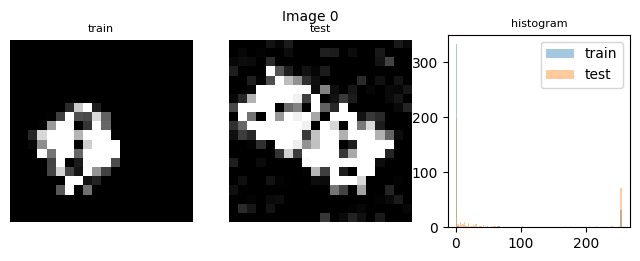

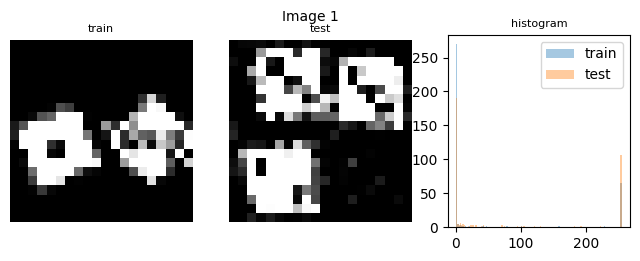

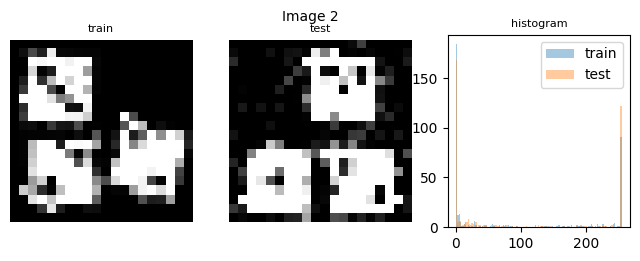

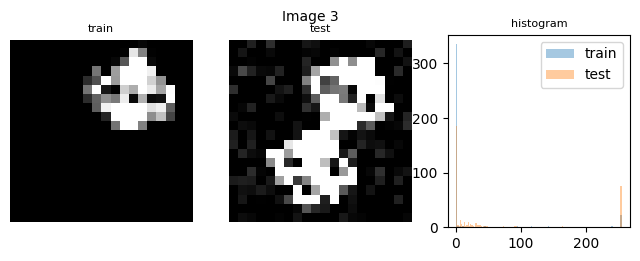

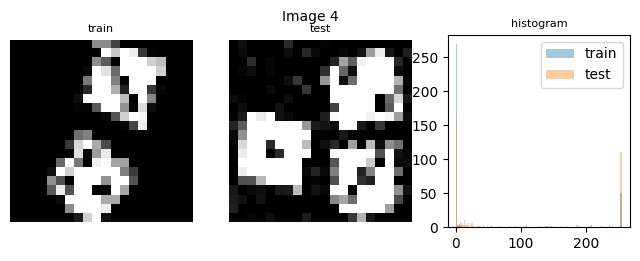

In [128]:
for j in range(5):
    compare(X_train, X_test, j)

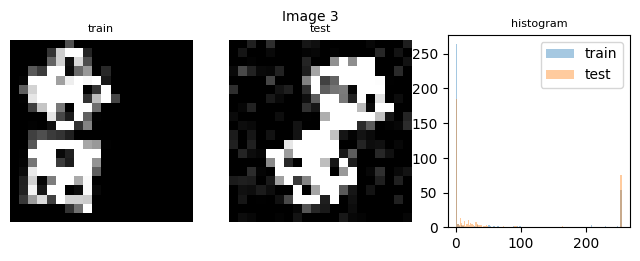

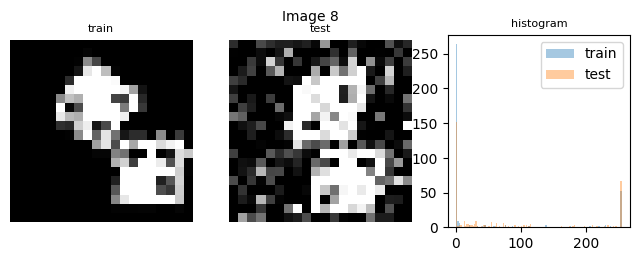

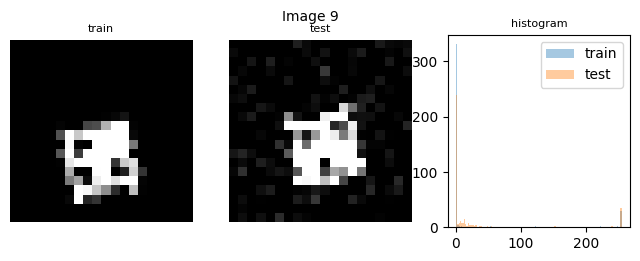

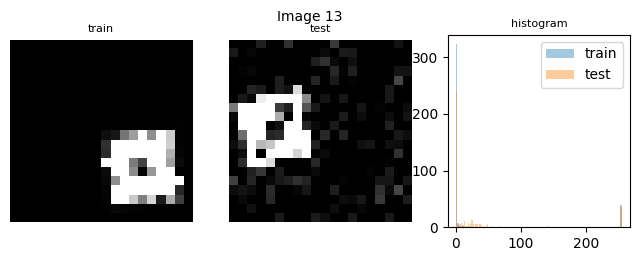

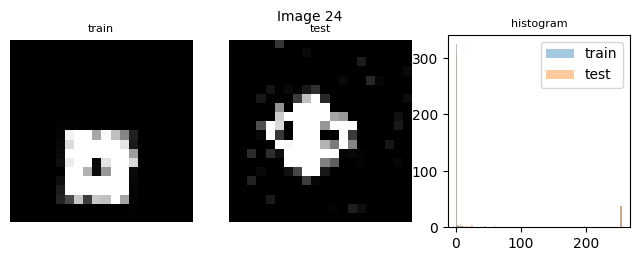

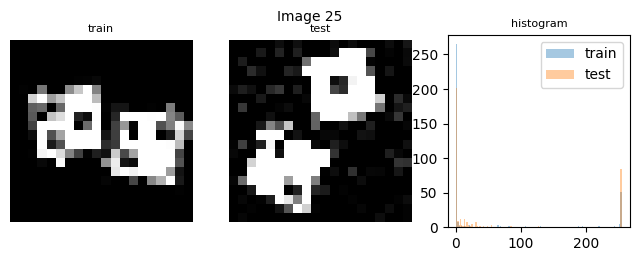

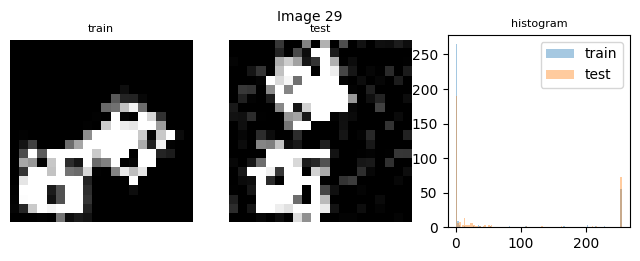

In [104]:
indice = [3, 8, 9, 13, 24, 25, 29]

for j in indice:
    compare(X_train, X_test, j)

In [105]:
# パット見10個から100個くらいがランダムに（0~50）が足されるイメージ

np.mean(X_train == 0), np.mean(X_test == 0) # サイコロが3つあるものもあるので参考にしにくい

(0.7383152, 0.474110123585587)

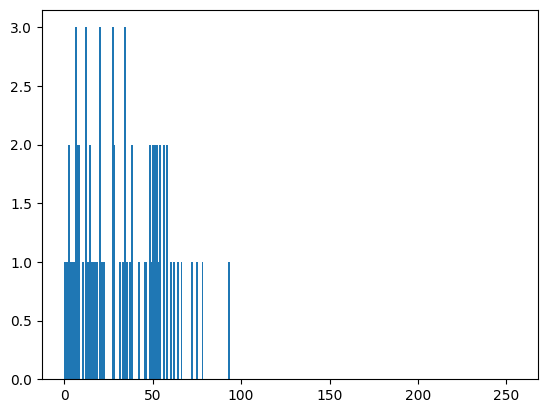

In [106]:
num_values = np.random.randint(20, 100)
values = np.random.normal(loc=30, scale=30, size=num_values)
values[values < 0] = np.random.randint(1, 50, size=np.sum(values < 0))
plt.hist(values, bins=256, range=(0, 255))
plt.show()

In [116]:
def add_random_noise(data, loc=15, scale=30):
    data_copy = data.copy()
    # 正規分布からランダムな値を20から100個選ぶ
    num_values = np.random.randint(20, 200)
    values = np.random.normal(loc=loc, scale=scale, size=num_values)
    values[values < 0] = np.random.randint(1, 50, size=np.sum(values < 0))

    # ランダムな位置に値を追加
    indices = np.random.choice(range(20 * 20), size=num_values, replace=False)
    data_copy[indices] = values

    # 0~255に収める
    data_copy[data_copy < 0] = 0
    data_copy[data_copy > 255] = 255

    return data_copy

In [117]:
X_train_noisy = np.array([add_random_noise(x) for x in X_train.reshape(-1, 20 * 20)]).reshape(X_train.shape[0], 20, 20)
X_train_noisy.shape

(200000, 20, 20)

In [118]:
np.mean(X_train == 0), np.mean(X_train_noisy == 0), np.mean(X_test == 0) # サイコロが3つあるものもあるので参考にしにくい

(0.7383152, 0.5393512, 0.474110123585587)

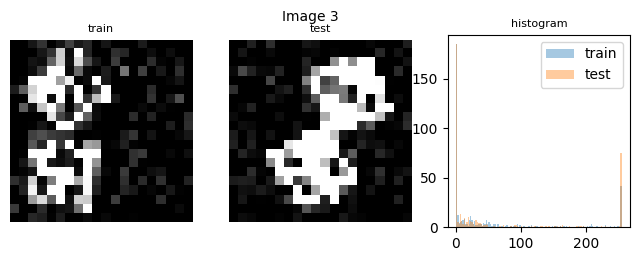

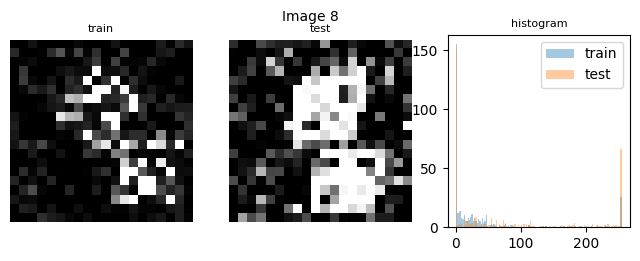

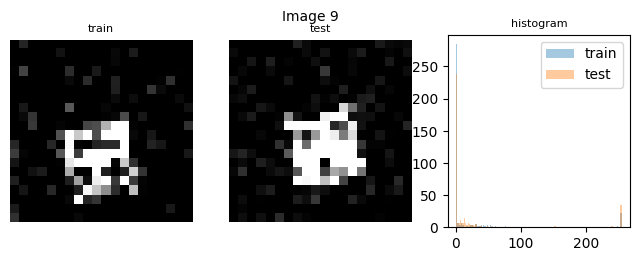

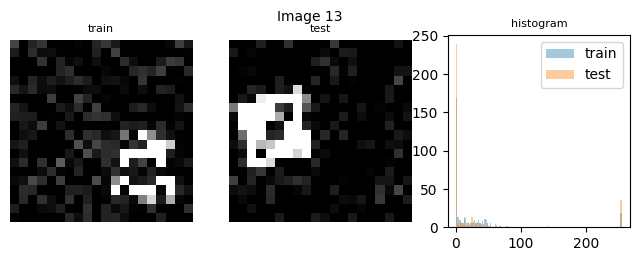

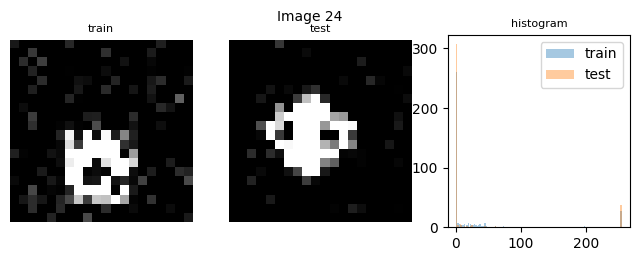

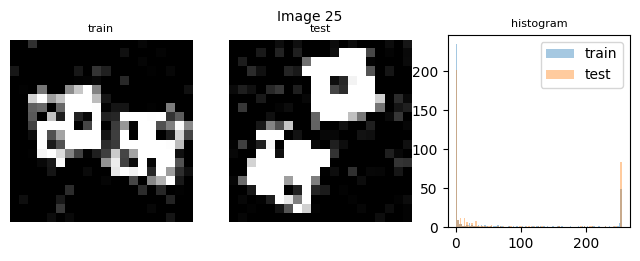

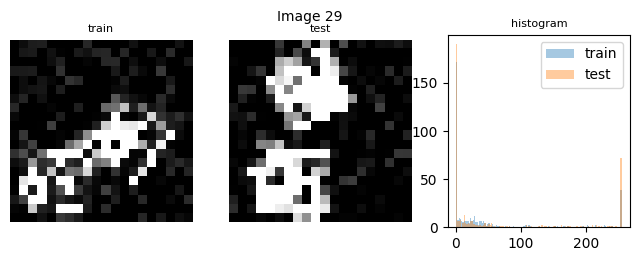

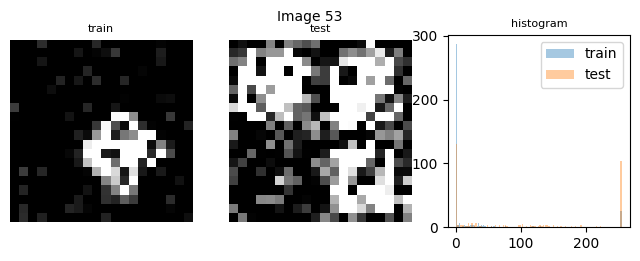

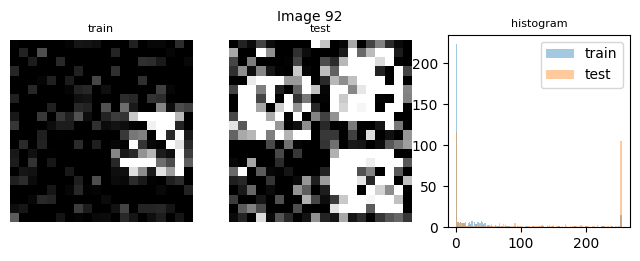

In [141]:
indice = [3, 8, 9, 13, 24, 25, 29, 53, 92]

for j in indice:
    compare(X_train_noisy, X_test, j)

In [120]:
def plot_result(X, i=0):
    fig, axes = plt.subplots(10, 10, figsize=(15, 15))
    for m in range(10):
        for n in range(10):
            k = 10*10*i + m*10 + n
            test = X[k]
            axes[m, n].imshow(test, cmap='gray', vmin=0, vmax=255)
            axes[m, n].set_title(f"index:{k}", fontsize=6)
            axes[m, n].axis('off')
    plt.show()

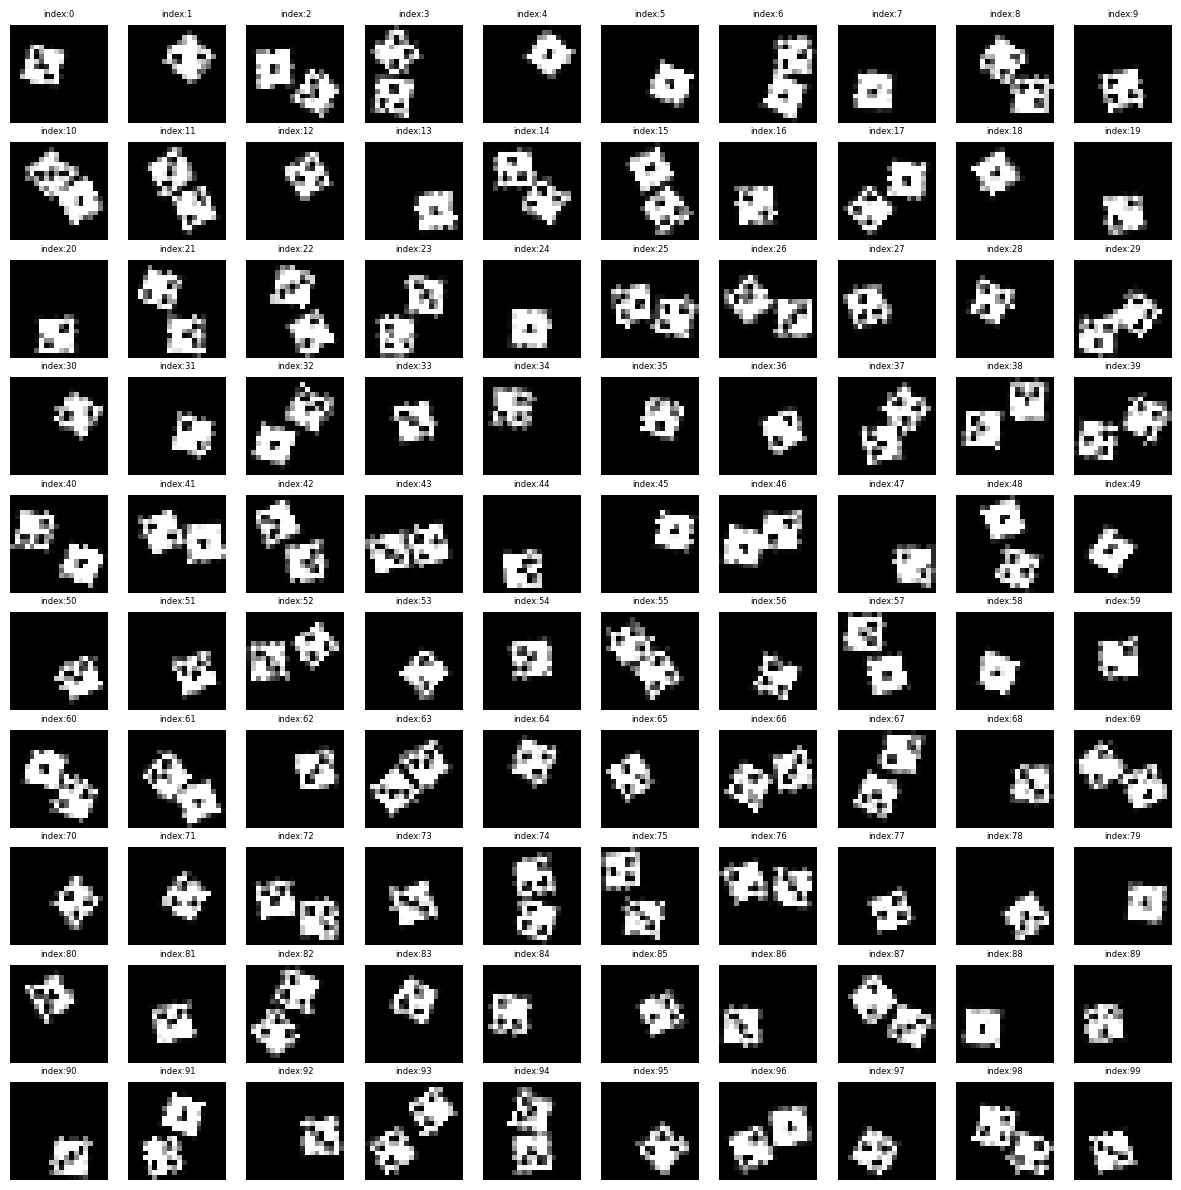

In [121]:
plot_result(X_train, i=0)

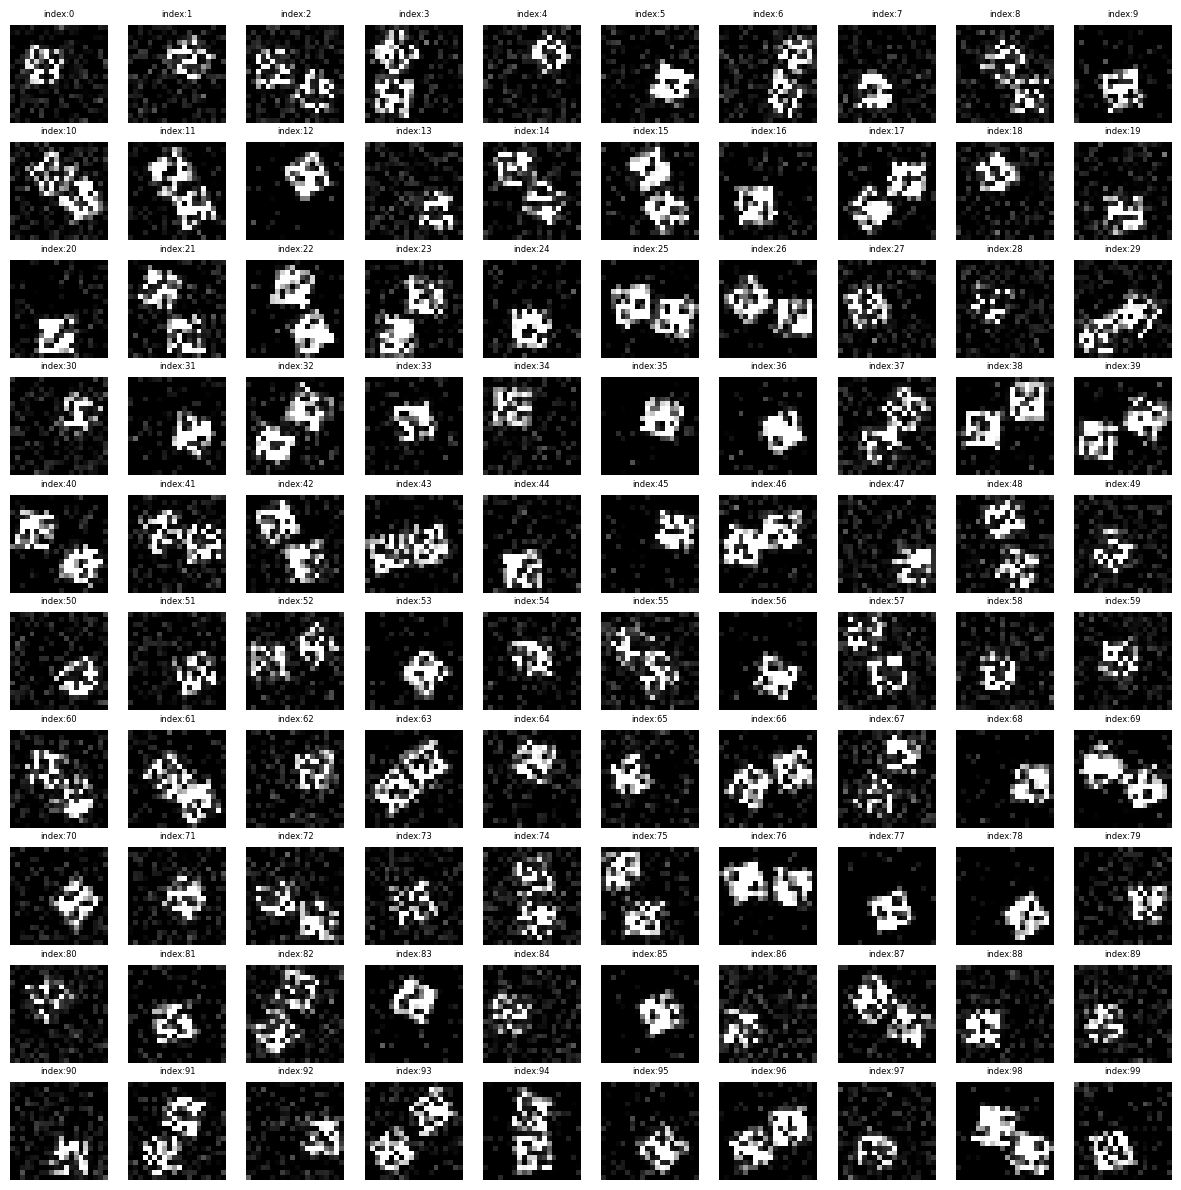

In [122]:
plot_result(X_train_noisy, i=0)

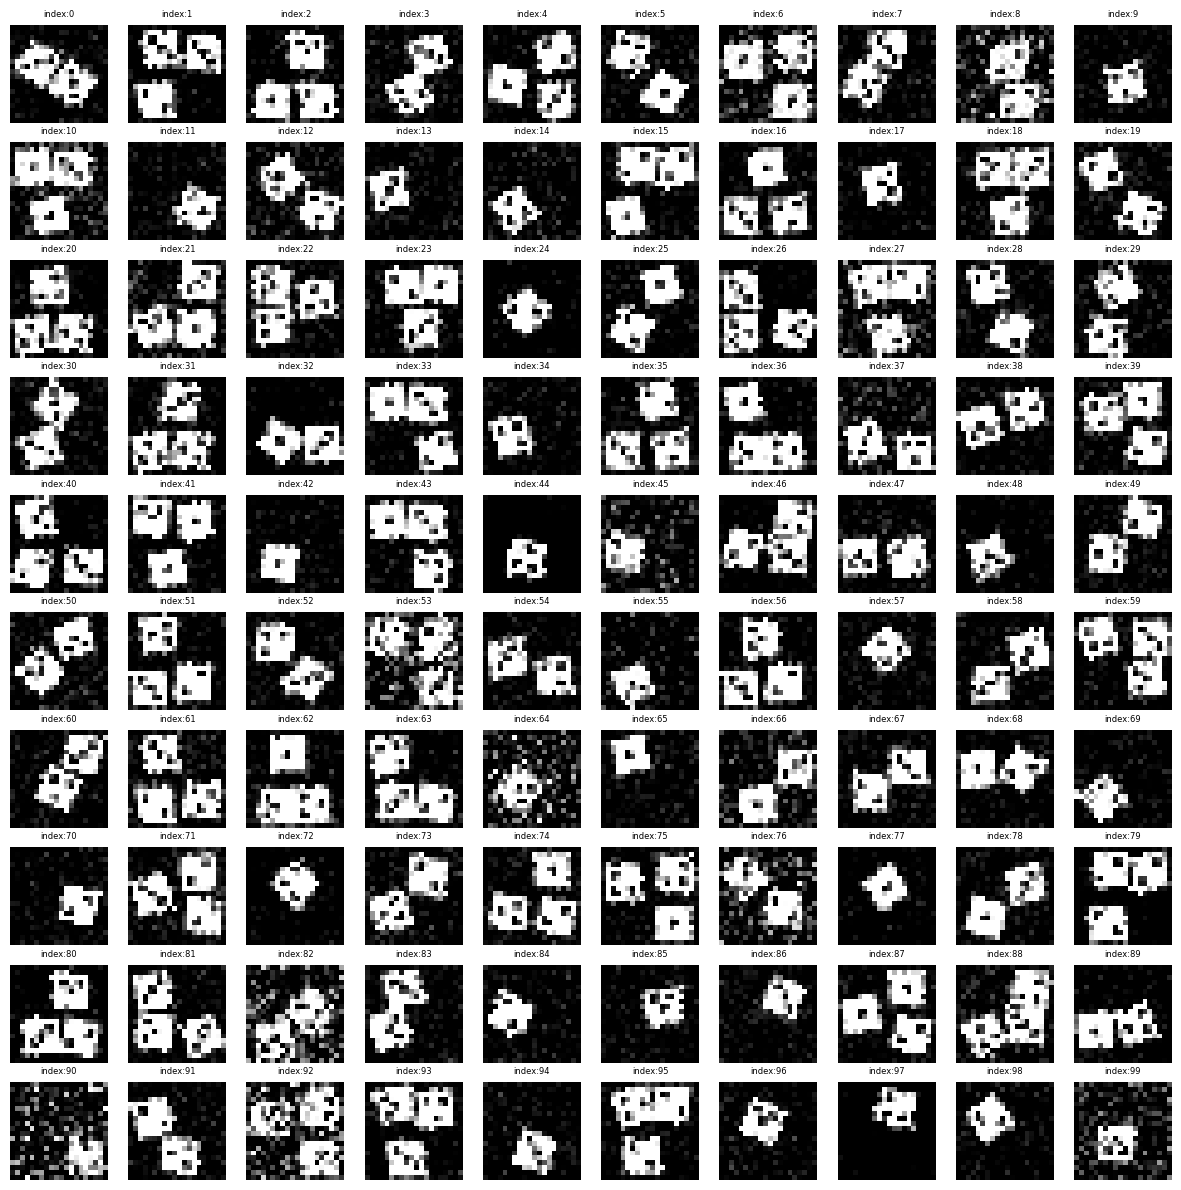

In [123]:
plot_result(X_test, i=0)

In [142]:
X_train_noise = np.load(os.path.join(CONF.PATH.DATASET, "noise+comp", "X.npy"))
y_train_noise = np.load(os.path.join(CONF.PATH.DATASET, "noise+comp", "y.npy"))
X_train_noise = X_train_noise.reshape(X_train_noise.shape[0], 20, 20)

In [143]:
np.mean(X_train_noisy == 0), np.mean(X_test == 0)

(0.5393512, 0.474110123585587)

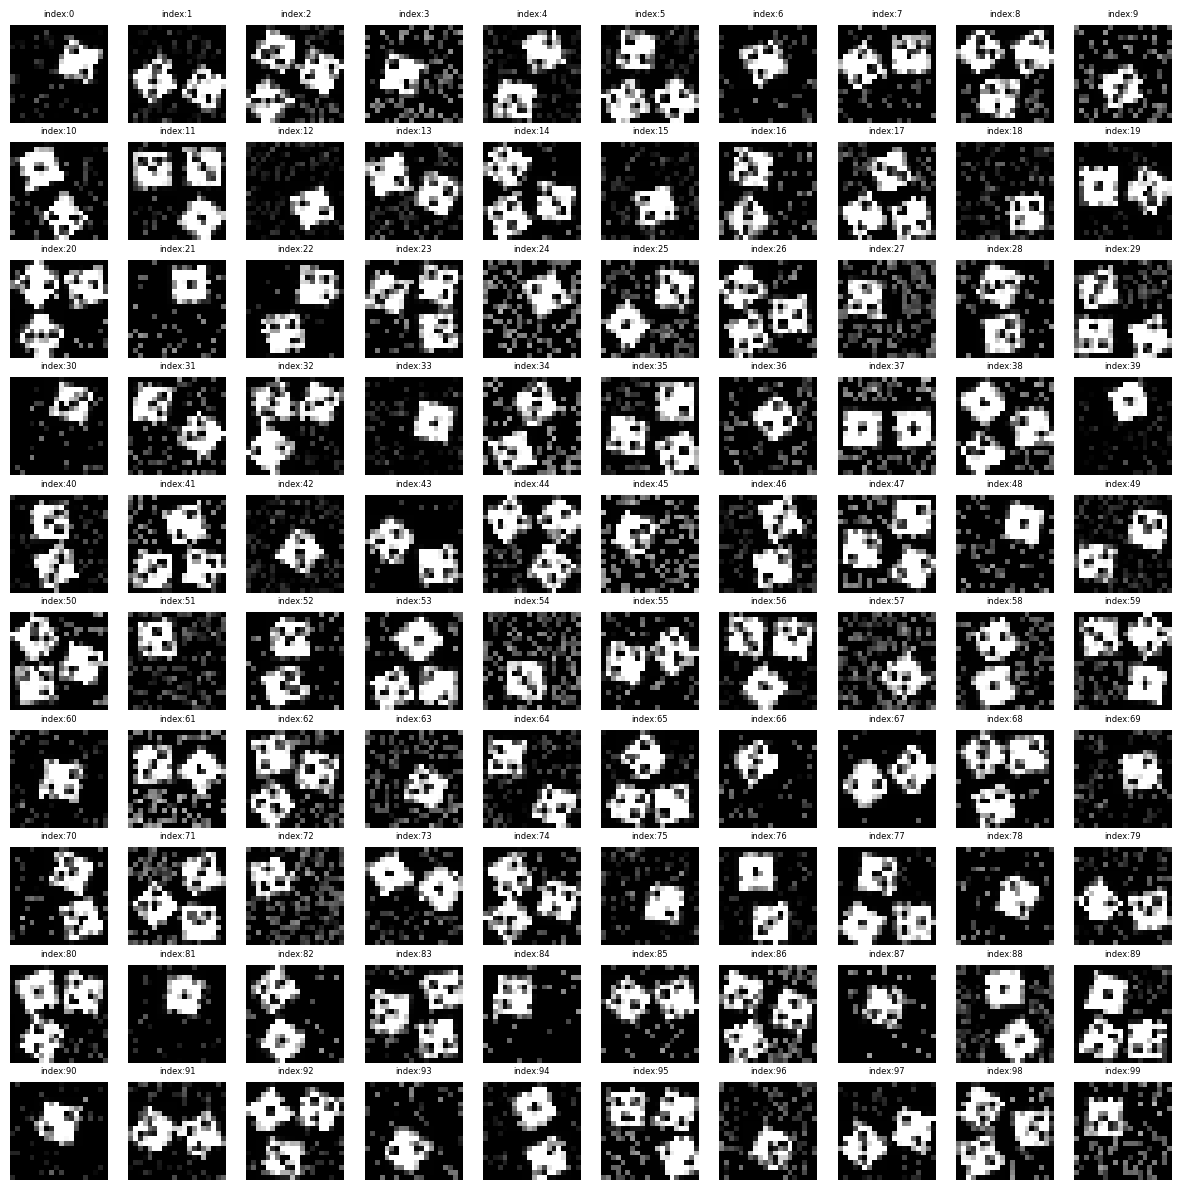

In [144]:
plot_result(X_train_noise, i=0)